# SMV2rho: Tutorial 3

In this tutorial we will convert a Vs profile to density using Brocher's (2005) approach.  To generate a density profile from Vs, we need to convert to Vp first as Brocher uses the Nafe Drake relationship which does not have a separate parameterisation for Vs.

First let's import the required modules from `SMV2rho`.

In [21]:
# import modules
from SMV2rho import plotting as smplt
from SMV2rho import density_functions as smd

## Class approach
### Load file

We can load in the test Vp velocity profile.  We will use the `profile_type` variable to label the profile "Vs".  We will tell the program that the profile is in the Europe region.  Note that if this is not set, then the region will be set to either "None" or will be picked up from the file string.  It can only be picked up automatically from the file string if the correct file structure is being used!

In [15]:
# path to test velocity file
#  - this file comes with the distribution so there is no need to change this path
vs_file = "../TEST_DATA/HUDSON_BAY/Vs/RECEIVER_FUNCTION/DATA/AKVQ.dat"

# load a profile into the Convert class -- note this time we are labellig the profile_type "Vs"
profile = smd.Convert(vp_file, profile_type = "Vs", region_name = "EUROPE")

### Read data

Now read the data in the velocity profile file.

In [16]:
# read data
profile.read_data()

# print data dictionary keys to check fields
profile.data.keys()

dict_keys(['station', 'Vs_file', 'region', 'moho', 'location', 'av_Vs', 'Vs', 'type', 'method'])

### Converting Vs profile

Now we will try to convert this profile to density using the `Vp_to_density_brocher` method.  Attempting to run this method will raise a `NameError` because we have not generated a Vs profile yet.  Brocher's approach requires us to first convert Vs into Vp using the polynomial regression in the 2005 paper, and then into density using the Nafe-Drake relationship.  The workflow requires this ordering so that we keep track of the steps required to generate a density profile from a Vs profile using the Nafe-Drake relationship.

In [17]:
profile.Vp_to_density_brocher()

NameError: You haven't created a Vp array yet! Convert Vs to Vp first!

This error tells us that we have missed a step!  First we need to run `convert_profile_brocher` in order to generate a calculated Vp profile.  Try the following...

In [18]:
# convert Vs profile to Vp
profile.convert_profile_brocher()

# convert calculated Vp profile into density
profile.Vp_to_density_brocher()

# check the keys of the updated dictionary
profile.data.keys()

dict_keys(['station', 'Vs_file', 'region', 'moho', 'location', 'av_Vs', 'Vs', 'type', 'method', 'Vp_calc', 'av_Vp_calc', 'Vp_calc_Vs', 'rho', 'av_rho'])

We can now see that we have generated a number of new  dictionary fields in `profile.data`.  These fields include `'Vp_calc'`, `'rho'`, and their corresponding average values.  these fields contain the calculated Vp and density profiles as a function of depth, and their depth-averaged bulk values.

## Function Approach

As seen in tutorial 2, we can instead implement an approach that uses the `convert_V_profile` function to calculate the profile.  This approach gives us less flexibility but achieves the same outcome if the user is not so comfortable with classes.  It is a simple one-liner, in which the function organises all the data and runs the approprite conversion functions and classes in the back end.

Note that we must use `profile_type = 'Vs'`.

In [25]:
# call density conversion function
# note that using profile_type="Vs" first calls a function to convert to Vp
# as is required by Brocher's (2005) approach.
profile_brocher = smd.convert_V_profile(vs_file, 
                            profile_type="Vs", 
                            approach="brocher",
                            working_file = True)

# print the keys to check that the outputs are identical to the class method
profile_brocher.keys()

working on ../TEST_DATA/HUDSON_BAY/Vs/RECEIVER_FUNCTION/DATA/AKVQ.dat


dict_keys(['station', 'Vs_file', 'region', 'moho', 'location', 'av_Vs', 'Vs', 'type', 'method', 'Vp_calc', 'av_Vp_calc', 'Vp_calc_Vs', 'rho', 'av_rho'])

## Plotting

Now let's plot up a couple of things to check what the results look like...

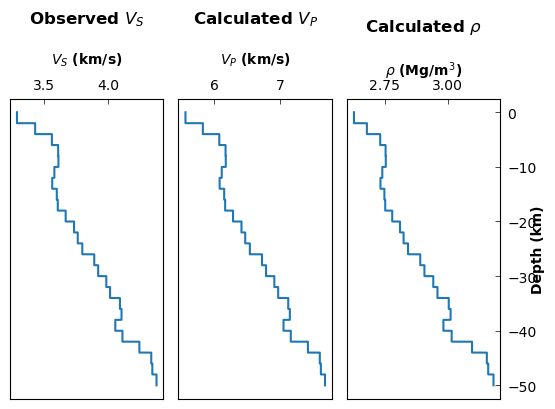

In [42]:
# Define plot settings
plot_type = 'line'
titles = [r'Observed ${V_S}$', r'Calculated ${V_P}$', r'Calculated $\rho$']
xlabels = [r'${V_S}$ (km/s)', r'${V_P}$ (km/s)', r'$\rho$ (Mg/m${^3}$)']
ylabels = ['Depth (km)', 'Depth (km)', 'Depth (km)']

# data1, data2 and data3 -- list of dictionaries for each panel for each data series.
data1 = [{'x': profile_brocher["Vs"][:,1], 'y': profile_brocher["Vs"][:,0]}]
data2 = [{'x': profile_brocher["Vp_calc"][:,1], 'y': profile_brocher["Vp_calc"][:,0]}]
data3 = [{'x': profile_brocher["rho"][:,1], 'y': profile_brocher["rho"][:,0]}]

# Call the plot_panels function
smplt.plot_panels([data1, data2, data3], plot_type=plot_type, 
            cmap=None, titles=titles, 
            xlabels=xlabels, ylabels=ylabels,
            z_values=None, figure_scale=0.7, 
            save_path=None)